База ML

Нахождение среднего эмпирического риска по имеющейся входной, выходной выборке, коэффициентам модели и самой модели

In [4]:
import numpy as np

np.random.seed(0)
x = np.arange(-1.0, 1.0, 0.1)

size_train = len(x)
w = [0.5, -0.3]
model_a = lambda m_x, m_w: (m_w[1] * m_x + m_w[0])
loss = lambda ax, y: (ax - y) ** 2

y = model_a(x, w) + np.random.normal(0, 0.1, size_train)

Q = loss(model_a(x, w), y).mean()
print(Q)

0.010469526728196498


Нахождение коэффициентов модели по входным и выходным данным, а также с использованием производной по среднему эмпирическому риску

In [5]:
import numpy as np

np.random.seed(0)
x = np.arange(-1.0, 1.0, 0.1)


model_a = lambda xx, ww: (ww[0] + ww[1] * xx)
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x))

Y = Y.reshape(-1, 1)
x1 = np.ones((len(x), 1))
x = x.reshape(-1, 1)
X = np.hstack((x1, x))
w = np.linalg.inv(X.T @ X) @ X.T @ Y
print(w)

[[-5.14605924]
 [ 0.64014601]]


In [6]:
import numpy as np

np.random.seed(0)
x = np.arange(-1.0, 1.0, 0.1)


model_a = lambda xx, ww: (ww[0] + ww[1] * xx + ww[2] * xx ** 2 + ww[3] * xx ** 3)
Y = np.sin(x * 5) + 2 * x + np.random.normal(0, 0.1, len(x))

X = np.array([[1, xx, xx**2, xx**3] for xx in x])

w = np.linalg.inv(X.T @ X) @ X.T @ Y
print(w)

[ 0.12132278  4.16006063 -0.35256616 -4.19339165]


Создание модели и выходной выборки по входной выборке и коэффициентам модели, полученным вручную

In [7]:
import numpy as np

x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]


w = np.array([33/13, -9/13, -1])

x_test = np.array([(1,) + tup for tup in x_test])

model_a = lambda xx, ww: -1 if xx[0]*ww[0] + xx[1]*ww[1] + xx[2]*ww[2] < 0 else 1
predict = [model_a(x, w) for x in x_test]
print(predict)

[1, -1, -1, 1, -1, 1, 1]


In [8]:
import numpy as np

x_test = [(9, 6), (2, 4), (-3, -1), (3, -2), (-3, 6), (7, -3), (6, 2)]

w = np.array([2.8, -1.4, 1])

x_test = np.array([(1,) + tup for tup in x_test])

model_a = lambda xx, ww: -1 if xx[0]*ww[0] + xx[1]*ww[1] + xx[2]*ww[2] < 0 else 1
predict = [model_a(x, w) for x in x_test]
print(predict)

[-1, 1, 1, -1, 1, -1, -1]


Подсчет отступов по имеющимся коэффициентам модели и по полученой вручную входной и выходной выборке

In [9]:
import numpy as np

w = np.array([15/7, -9/7, -1])
x_test = np.array([(1, -8, -4), (1, -2, 2), (1, 4, 8), (1, 6, 3)])
y_test = np.array([1, 1, -1, -1])

margin = x_test @ w.T * y_test
print(margin)

[16.42857143  2.71428571 11.          8.57142857]


Подсчет отступов по полученой вручную входной, выходной выборке и коэффициентам модели

In [10]:
import numpy as np

w = np.array([-16, -4, 9])
x_test = np.array([(1, -5, 2), (1, -4, 6), (1, 3, 2), (1, 3, -3), (1, 5, 6), (1, 9, 2)])
y_test = np.array([1, 1, 1, -1, -1, -1])

margin = x_test @ w.T * y_test
print(margin)

[ 22  54 -10  55 -18  34]


По входной, выходной выборке и коэффициентам модели нахождение показателя качества(нотация Айзерсона)

In [ ]:
import numpy as np

x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])
w = np.array([-8/3, -2/3, 1])

x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

predictions = np.dot(x_test, w)

Q = ((predictions * y_test) < 0).sum()
print(Q)

2


Нахождение среднего эмпирического риска по входной и выходной(полученной использованием функции) выборке с созданием модели и функции потерь
1) Квадратичная функция потерь
2) Абсолютная функция потерь

In [36]:
import numpy as np

def func(x):
    return 0.1 * x**2 - np.sin(x) + 0.1 * np.cos(x * 5) + 1

model_a = lambda xx, ww: ww[0]+ww[1]*xx+ww[2]*xx**2+ww[3]*xx**3+ww[4]*xx**4
loss = lambda ax, fx: (ax-fx)**2

w = np.array([1.11, -0.26, 0.061, 0.0226, 0.00178])

coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)

Q = loss(model_a(coord_x, w), coord_y).mean()
print(Q)

0.17749243683224197


In [37]:
import numpy as np

def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

model_a = lambda xx, ww: ww[0]+ww[1]*xx+ww[2]*xx**2+ww[3]*np.cos(2*xx)+ww[4]*np.sin(2*xx)
loss = lambda ax, fx: np.abs(ax-fx)

w = np.array([-1.59, -0.69, 0.278, 0.497, -0.106])

coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)

Q = loss(model_a(coord_x, w), coord_y).mean()
print(Q)

0.9250026294525024


Финальное задание: бинарная классификация
Квадратичная функция потерь

In [45]:
import numpy as np

data_x = np.array([(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)])
data_y = np.array([-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1])

data_x = np.hstack((np.ones((data_x.shape[0], 1)), data_x))

w = (data_x.T @ data_y) @ (np.linalg.inv(data_x.T @ data_x))

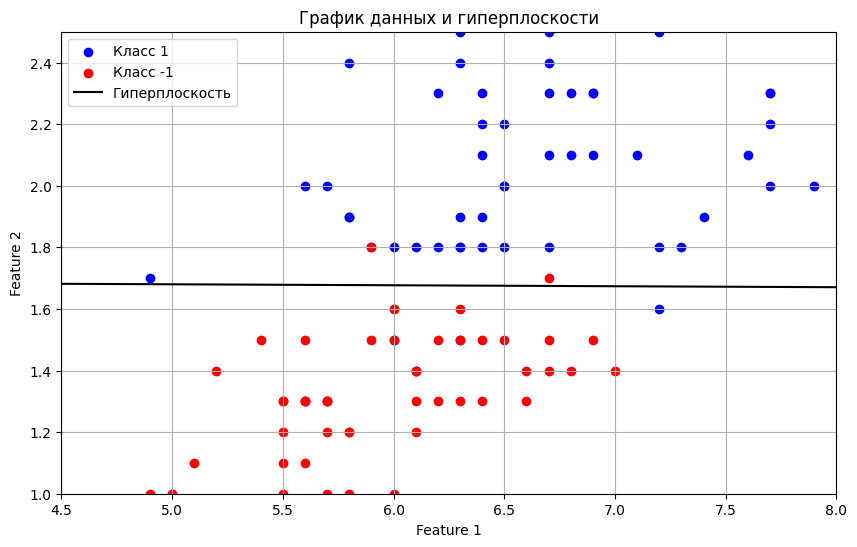

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(data_x[data_y == 1][:, 1], data_x[data_y == 1][:, 2], color='blue', label='Класс 1')
plt.scatter(data_x[data_y == -1][:, 1], data_x[data_y == -1][:, 2], color='red', label='Класс -1')

x_vals = np.linspace(4.5, 8.0, 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Гиперплоскость')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('График данных и гиперплоскости')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.xlim(4.5, 8.0)
plt.ylim(1.0, 2.5)
plt.legend()
plt.grid()
plt.show()